In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
ls

data/  day4.ipynb  day4_meta.ipynb  HelloGithub.ipynb  matrix_one/  README.md


In [0]:
ls data

men_shoes.csv


In [0]:
df=pd.read_csv('data/men_shoes.csv',low_memory=False)
df.shape

(18280, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price=np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [0]:
y_true=df['prices_amountmin']
y_pred=[mean_price]*y_true.shape[0]
mean_absolute_error(y_true, y_pred)

63.968341227870624

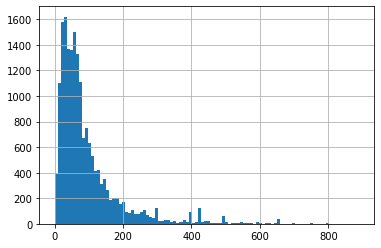

In [0]:
df['prices_amountmin'].hist(bins=100)

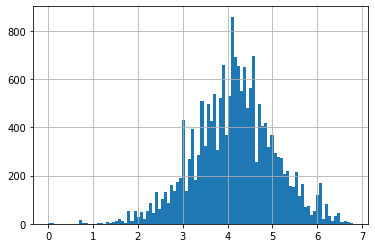

In [0]:
np.log( df['prices_amountmin']+1 ) .hist(bins=100)

In [0]:
y_true=df['prices_amountmin']
y_pred=[np.median(y_true)]*y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
ls 

data/  day4.ipynb  day4_meta.ipynb  HelloGithub.ipynb  matrix_one/  README.md


In [0]:
y_true=df['prices_amountmin']
price_log_mean=np.expm1(np.mean(np.log1p(y_true)))
y_pred= [price_log_mean]*y_true.shape[0]
mean_absolute_error(y_true, y_pred)


58.03539547661041

In [0]:
np.expm1(np.mean(np.log1p(y_true)))


62.92811169273113

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df.brand.value_counts()

Nike            1709
PUMA             574
Ralph Lauren     524
New Balance      361
VANS             356
                ... 
S-ZONE             1
Bindi              1
AIR BALANCE        1
Tempur-Pedic       1
Dc Shoes           1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
df['brand_cat']=df['brand'].factorize()[0]

In [0]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [0]:
feats=['brand_cat']

In [0]:
x=df[feats].values
y=df['prices_amountmin'].values
model=DecisionTreeRegressor(max_depth=5)
scores=cross_val_score(model,x,y,scoring='neg_mean_absolute_error')

In [0]:
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'brand.cat',
       'brand_cat'],
      dtype='object')

In [0]:
df['manufacturer_cat']=df['manufacturer'].factorize()[0]

In [0]:
def run_model(feats):
  x=df[feats].values
  y=df['prices_amountmin'].values
  model=DecisionTreeRegressor(max_depth=5)
  scores=cross_val_score(model,x,y,scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
run_model(['brand_cat','manufacturer_cat'])

(-58.539304199085976, 4.311223231615431)

In [0]:
!cat dw_matrix/.gitignore

In [0]:
!git add "day4.ipynb"

In [0]:
!git commit -m "add day4"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@053682b644e8.(none)')


In [0]:
  !git config --global user.email "lmag84@gmail.com"
  !git config --global user.name "Magda"

In [71]:
!git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date
